# 전력사용량 예측 AI 경진대회

* K-최근접 이웃 연습
* 회귀 복습

### 데이터 설명(출처: Dacon)
##### train 데이터 :
* 60개 건물들의 2020년 6월 1일 부터 2020년 8월 24일까지의 데이터
* 1시간 단위로 제공
* 전력사용량(kWh) 포함
* train.shape: (122400, 10)
* num:건물번호
 
##### test 데이터 :
* 60개 건물들의 2020년 8월 25일 부터 2020년 8월 31일까지의 데이터
* 3시간 단위로 제공(강수량의 경우 6시간 단위로 제공, 예보데이터)
* 전력사용량(kWh) 미포함
* test.shape: (10080, 9)
* num:건물번호

In [1]:
# 패키지 설치
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

## 데이터 불러오고 기본 정보 확인

In [2]:
# 데이터 불러오기
train= pd.read_csv('C:/Users/82102/Desktop/energy/train.csv',encoding='euc-kr')
train

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0
122396,60,2020-08-24 20,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0
122397,60,2020-08-24 21,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0
122398,60,2020-08-24 22,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0


In [3]:
# 데이터 불러오기
test= pd.read_csv('C:/Users/82102/Desktop/energy/test.csv', encoding='euc-kr')
test

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,NaN,NaN
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0,NaN,NaN
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10076,60,2020-08-31 20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10077,60,2020-08-31 21,27.9,4.1,68.0,NaN,0.0,1.0,1.0
10078,60,2020-08-31 22,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# 데이터 정보 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   num         122400 non-null  int64  
 1   date_time   122400 non-null  object 
 2   전력사용량(kWh)  122400 non-null  float64
 3   기온(°C)      122400 non-null  float64
 4   풍속(m/s)     122400 non-null  float64
 5   습도(%)       122400 non-null  float64
 6   강수량(mm)     122400 non-null  float64
 7   일조(hr)      122400 non-null  float64
 8   비전기냉방설비운영   122400 non-null  float64
 9   태양광보유       122400 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 9.3+ MB


In [5]:
# 결측값 확인
train.isnull().sum()

num           0
date_time     0
전력사용량(kWh)    0
기온(°C)        0
풍속(m/s)       0
습도(%)         0
강수량(mm)       0
일조(hr)        0
비전기냉방설비운영     0
태양광보유         0
dtype: int64

In [6]:
test.isnull().sum()

num                0
date_time          0
기온(°C)          6720
풍속(m/s)         6720
습도(%)           6720
강수량(mm, 6시간)    8400
일조(hr, 3시간)     6720
비전기냉방설비운영       7784
태양광보유           8456
dtype: int64

* test set에서만 결측값 존재

## 전처리

In [7]:
# 월, 일, 시간 변수 추가
def make_time(train):
    """
    시간 관련 변수를 추가하기 위한 함수
    """
    train['date_time'] = pd.to_datetime(train.date_time)
    
    train['month'] = train.date_time.dt.month                    # 월(숫자)
    train['day'] = train.date_time.dt.day                        # 일(숫자)
    train['hour'] = train.date_time.dt.hour                      # 시(숫자)
    
    return train

In [8]:
train = make_time(train)
test = make_time(test)

In [9]:
train

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,month,day,hour
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,6,1,0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,6,1,1
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,6,1,2
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,6,1,3
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,6,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19:00:00,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0,8,24,19
122396,60,2020-08-24 20:00:00,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0,8,24,20
122397,60,2020-08-24 21:00:00,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0,8,24,21
122398,60,2020-08-24 22:00:00,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0,8,24,22


## EDA

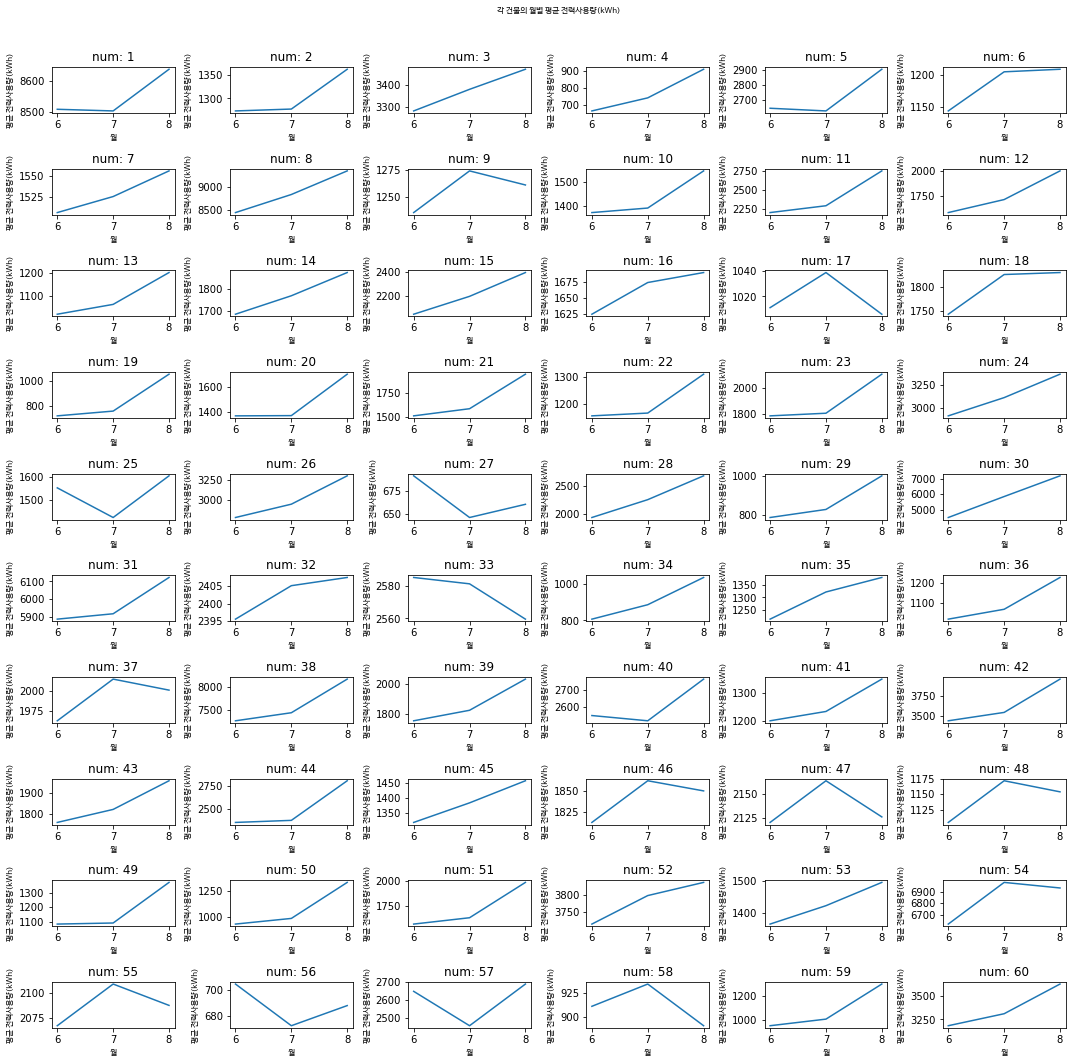

In [74]:
fig = plt.figure(figsize = (15 ,15))
font_path='C:/users/82102/appdata/local/microsoft/windows/fonts/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=8)
plt.title("각 건물의 월별 평균 전력사용량(kWh)", fontsize=15,fontproperties=fontprop, y=1.05)
plt.axis('off')

for num in range(1,61):
    df = train[train.num==num]
    ax = fig.add_subplot(10,6,num)
    ax.plot(df['month'].unique(), df.groupby('month')['전력사용량(kWh)'].mean())
    ax.set_title(f'num: {num}')
    ax.set_xticks([6,7,8])
    plt.xlabel('월',fontproperties=fontprop)
    plt.ylabel('평균 전력사용량(kWh)',fontproperties=fontprop)
plt.tight_layout()
plt.show()

* 건물별로 각 월에 높게 띠는 때가 존재함

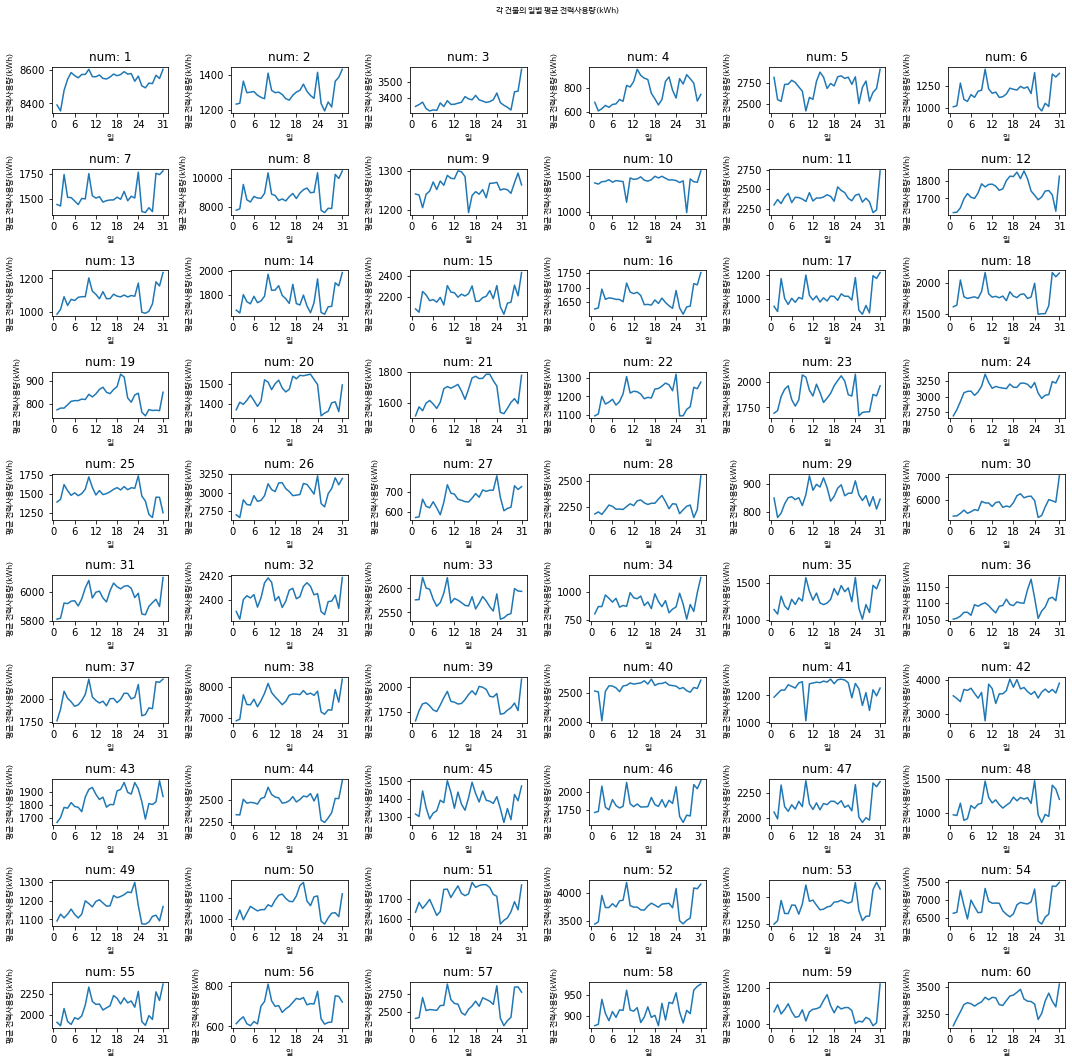

In [76]:
fig = plt.figure(figsize = (15 ,15))
font_path='C:/users/82102/appdata/local/microsoft/windows/fonts/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=8)
plt.title("각 건물의 일별 평균 전력사용량(kWh)", fontsize=15,fontproperties=fontprop, y=1.05)
plt.axis('off')

for num in range(1,61):
    df = train[train.num==num]
    ax = fig.add_subplot(10,6,num)
    ax.plot(df['day'].unique(), df.groupby('day')['전력사용량(kWh)'].mean())
    ax.set_title(f'num: {num}')
    ax.set_xticks([0,6,12,18,24,31])
    plt.xlabel('일',fontproperties=fontprop)
    plt.ylabel('평균 전력사용량(kWh)',fontproperties=fontprop)
plt.tight_layout()
plt.show()

* 별 다른 패턴이 안보임

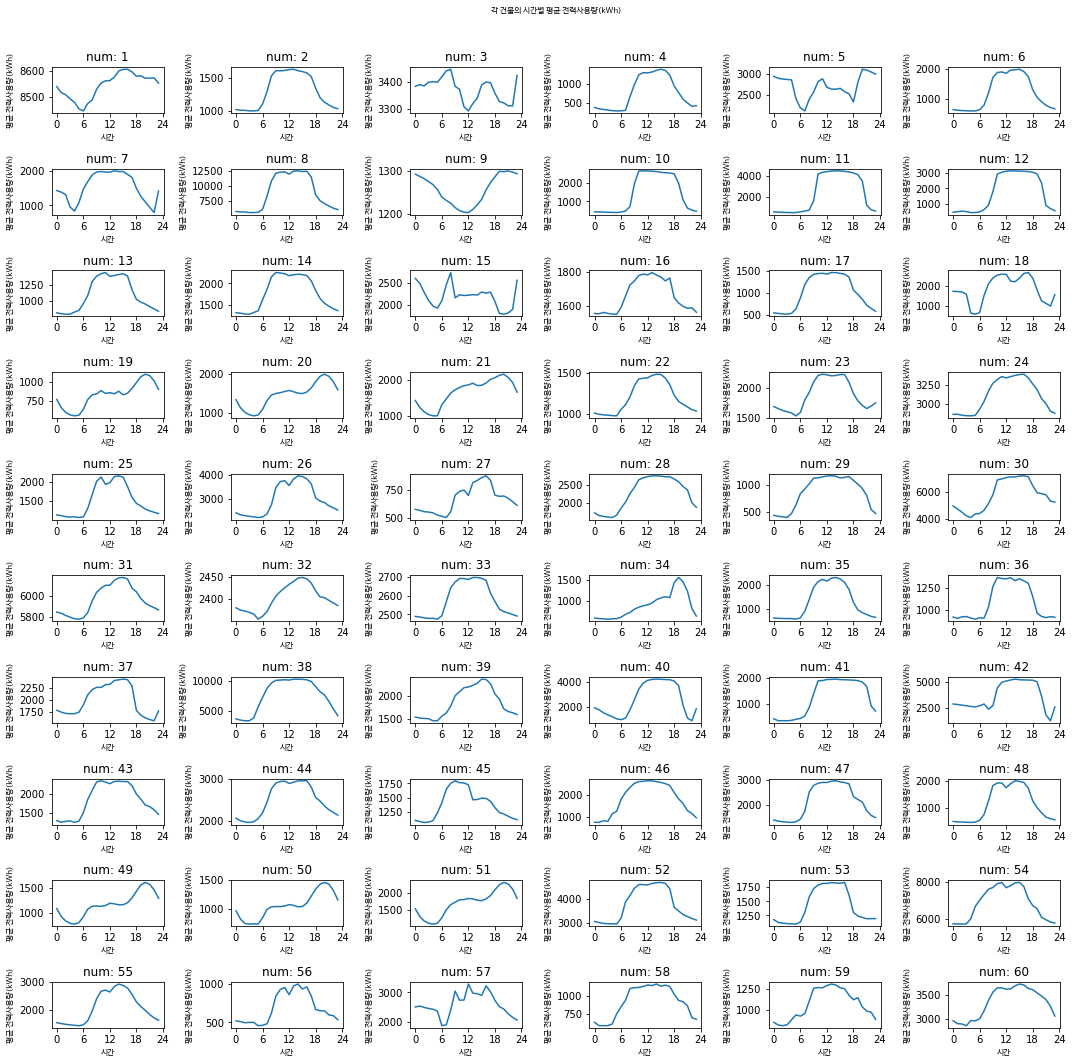

In [72]:
fig = plt.figure(figsize = (15 ,15))
font_path='C:/users/82102/appdata/local/microsoft/windows/fonts/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=8)
plt.title("각 건물의 시간별 평균 전력사용량(kWh)", fontsize=15,fontproperties=fontprop, y=1.05)
plt.axis('off')

for num in range(1,61):
    df = train[train.num==num]
    ax = fig.add_subplot(10,6,num)
    ax.plot(df['hour'].unique(), df.groupby('hour')['전력사용량(kWh)'].mean())
    ax.set_title(f'num: {num}')
    ax.set_xticks([0,6,12,18,24])
    plt.xlabel('시간',fontproperties=fontprop)
    plt.ylabel('평균 전력사용량(kWh)',fontproperties=fontprop)
plt.tight_layout()
plt.show()

* 낮 시간에 높은 건물, 밤시간에 높은 건물이 구분됨

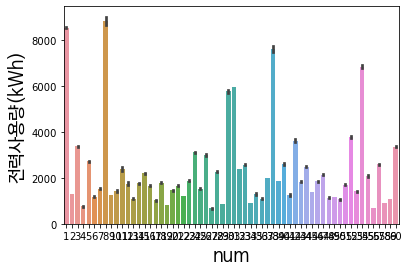

In [63]:
# 한글 깨짐 해결하기 위해 font 지정
import matplotlib.font_manager as fm
font_path='C:/users/82102/appdata/local/microsoft/windows/fonts/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)
sns.barplot(x='num', y='전력사용량(kWh)',data= train)
plt.xlabel('num',fontproperties=fontprop)
plt.ylabel('전력사용량(kWh)',fontproperties=fontprop)
plt.show()

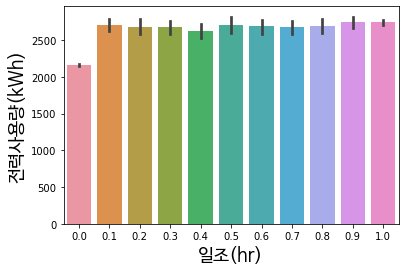

In [13]:
# 한글 깨짐 해결하기 위해 font 지정
import matplotlib.font_manager as fm
font_path='C:/users/82102/appdata/local/microsoft/windows/fonts/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)
sns.barplot(x='일조(hr)', y='전력사용량(kWh)',data= train)
plt.xlabel('일조(hr)',fontproperties=fontprop)
plt.ylabel('전력사용량(kWh)',fontproperties=fontprop)
plt.show()

* 전체적으로 비슷

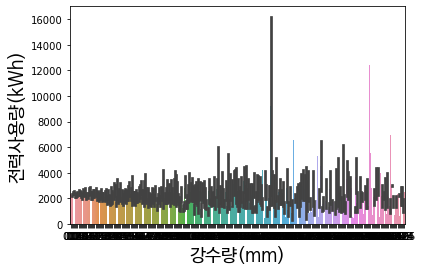

In [14]:
# 한글 깨짐 해결하기 위해 font 지정
import matplotlib.font_manager as fm
font_path='C:/users/82102/appdata/local/microsoft/windows/fonts/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)
sns.barplot(x='강수량(mm)', y='전력사용량(kWh)',data= train)
plt.xlabel('강수량(mm)',fontproperties=fontprop)
plt.ylabel('전력사용량(kWh)',fontproperties=fontprop)
plt.show()

* 강수량이 많을 때 조금 더 높은 경향..?

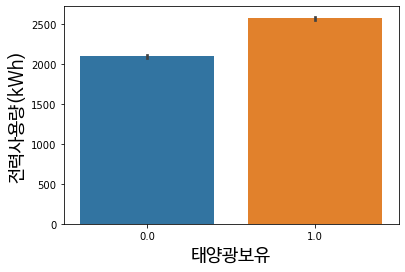

In [15]:
# 한글 깨짐 해결하기 위해 font 지정
import matplotlib.font_manager as fm
font_path='C:/users/82102/appdata/local/microsoft/windows/fonts/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)
sns.barplot(x='태양광보유', y='전력사용량(kWh)',data= train)
plt.xlabel('태양광보유',fontproperties=fontprop)
plt.ylabel('전력사용량(kWh)',fontproperties=fontprop)
plt.show()

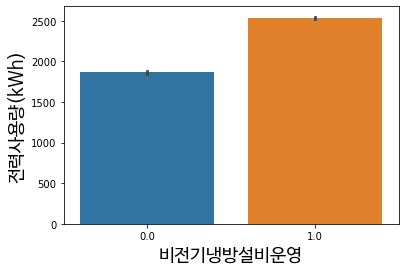

In [16]:
# 한글 깨짐 해결하기 위해 font 지정
import matplotlib.font_manager as fm
font_path='C:/users/82102/appdata/local/microsoft/windows/fonts/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)
sns.barplot(x='비전기냉방설비운영', y='전력사용량(kWh)',data= train)
plt.xlabel('비전기냉방설비운영',fontproperties=fontprop)
plt.ylabel('전력사용량(kWh)',fontproperties=fontprop)
plt.show()

## 모델링

In [17]:
# 타깃데이터 설정: 전력사용량(kWh)
target = train['전력사용량(kWh)']
data = train.drop(['전력사용량(kWh)', 'date_time'],axis = 1, inplace=False)

In [18]:
# 데이터 세트 분리
X_train, X_val, y_train, y_val = train_test_split(data, target, test_size= 0.3, random_state=156)

In [19]:
# 표준화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

### K- 최근접 이웃 회귀 - 기본모델

In [20]:
from sklearn.neighbors import KNeighborsRegressor

In [21]:
KNN = KNeighborsRegressor()
KNN.fit(X_train, y_train)
KNN_preds = KNN.predict(X_val)

In [22]:
KNN_preds

array([ 589.8744 , 3524.65695, 1330.8714 , ..., 1420.524  , 7299.4608 ,
        941.7492 ])

In [23]:
# 결정계수
print(KNN.score(X_val, y_val))

0.4230255328262119


In [25]:
# MSE
from sklearn.metrics import mean_squared_error, r2_score
prediction = KNN.predict(X_val)
mse = mean_squared_error(y_val, prediction)
rmse = np.sqrt(mse)

print('MSE:{0:.3f}, RMSE:{1:3.3F}'.format(mse, rmse))

MSE:2560856.347, RMSE:1600.268


### 파라미터 조절

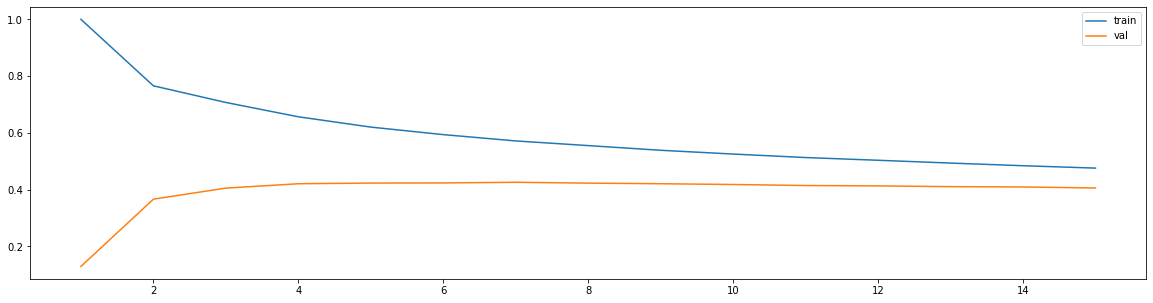

In [26]:
knn_res = pd.DataFrame()
for i in range(15):
    clf = KNeighborsRegressor(n_neighbors=i+1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    
    train_score = clf.score(X_train, y_train)
    val_score = clf. score(X_val, y_val)
    
    knn_res = knn_res.append(pd.DataFrame([train_score, val_score]).T)
    
knn_res.columns = ['train', 'val']
knn_res = knn_res.reset_index(drop=True)
knn_res = knn_res.set_index(knn_res.index +1)

knn_res.plot(kind='line', figsize= (20, 5))

* score: 결정계수

* 디폴트 5 값도 적당해 보이나 6으로 선택

In [47]:
KNN_6 = KNeighborsRegressor(n_neighbors = 6)
KNN_6.fit(X_train, y_train)
KNN_6_preds = KNN_6.predict(X_val)

In [48]:
KNN_6_preds

array([ 572.022   , 3516.094125, 1580.0835  , ..., 1563.066   ,
       7496.28    ,  938.907   ])

In [49]:
# 결정계수
print(KNN_6.score(X_val, y_val))

0.4235088979524707


In [50]:
# MSE
prediction = KNN_6.predict(X_val)
mse = mean_squared_error(y_val, prediction)
rmse = np.sqrt(mse)

print('MSE:{0:.3f}, RMSE:{1:3.3F}'.format(mse, rmse))

MSE:2558710.968, RMSE:1599.597


* RMSE 값이 아주 살짝 줄어들어 성능 더 좋아짐

### 별다른 상관관계가 보이지 않는 day 제거 후 KNN

In [51]:
# 타깃데이터 설정: 전력사용량(kWh)
target2 = train['전력사용량(kWh)']
data2 = train.drop(['전력사용량(kWh)', 'date_time', 'day'],axis = 1, inplace=False)

In [52]:
# 데이터 세트 분리
X_train, X_val, y_train, y_val = train_test_split(data2, target2, test_size= 0.3, random_state=156)

In [53]:
# 표준화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

In [54]:
KNN = KNeighborsRegressor()
KNN.fit(X_train, y_train)
KNN_preds = KNN.predict(X_val)

In [55]:
KNN_preds

array([ 562.14  , 2218.5864, 1178.2152, ..., 1311.552 , 6065.064 ,
       1088.8776])

In [56]:
# 결정계수
print(KNN.score(X_val, y_val))

0.46265804142726397


In [57]:
# MSE
from sklearn.metrics import mean_squared_error, r2_score
prediction = KNN.predict(X_val)
mse = mean_squared_error(y_val, prediction)
rmse = np.sqrt(mse)

print('MSE:{0:.3f}, RMSE:{1:3.3F}'.format(mse, rmse))

MSE:2384950.536, RMSE:1544.329


* 원래보다 나아짐

### day제거 KNN에서 파라미터 조절

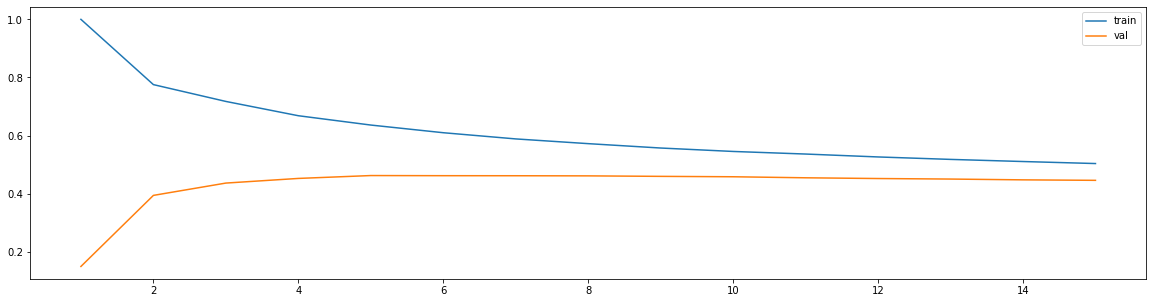

In [58]:
knn_res = pd.DataFrame()
for i in range(15):
    clf = KNeighborsRegressor(n_neighbors=i+1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    
    train_score = clf.score(X_train, y_train)
    val_score = clf. score(X_val, y_val)
    
    knn_res = knn_res.append(pd.DataFrame([train_score, val_score]).T)
    
knn_res.columns = ['train', 'val']
knn_res = knn_res.reset_index(drop=True)
knn_res = knn_res.set_index(knn_res.index +1)

knn_res.plot(kind='line', figsize= (20, 5))

* 디폴트 값 5 그대로

### 회귀분석

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_val)

In [33]:
lr_preds

array([1604.24289545, 2644.50701933, 2954.79808185, ..., 2409.88298565,
       2001.1229166 , 1869.98069116])

In [34]:
# 결정계수
print(lr.score(X_val, y_val))

0.07412797246308811


In [35]:
prediction = lr.predict(X_val)
mse = mean_squared_error(y_val, prediction)
rmse = np.sqrt(mse)

print('MSE:{0:.3f}, RMSE:{1:3.3F}'.format(mse, rmse))

MSE:4109411.062, RMSE:2027.168


### 회귀 규제 (릿지, 라쏘, 엘라스틱넷)

In [36]:
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

def get_linear_reg_eval(model_name, params = None, X_data_n = None, y_target_n = None, verbose =True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('###### ', model_name, '######')
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha=param)
        elif model_name == 'Lasso': model = Lasso(alpha=param)
        elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n,
                                            y_target_n, scoring = "neg_mean_squared_error", cv= 5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f}'.format(param, avg_rmse))
            
        model.fit(X_data_n, y_target_n)
        if return_coeff:
            coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
            colname = 'alpha:'+str(param)
            coeff_df[colname] = coeff
                
    return coeff_df

In [38]:
# 릿지
ridge_alphas = [0.07,0.1,1,10,100]
coeff_lasso_df = get_linear_reg_eval('Ridge', params = ridge_alphas, X_data_n = data, y_target_n = target)

######  Ridge ######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 1997.172
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 1997.172
alpha 1일 때 5 폴드 세트의 평균 RMSE: 1997.172
alpha 10일 때 5 폴드 세트의 평균 RMSE: 1997.165
alpha 100일 때 5 폴드 세트의 평균 RMSE: 1997.098


In [39]:
# 라쏘
lasso_alphas = [0.07,0.1,0.5,1,3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params = lasso_alphas, X_data_n = data, y_target_n = target)

######  Lasso ######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 1997.170
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 1997.169
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 1997.154
alpha 1일 때 5 폴드 세트의 평균 RMSE: 1997.145
alpha 3일 때 5 폴드 세트의 평균 RMSE: 1997.164


In [40]:
# 엘라스틱넷
elastic_alphas= [0.07,0.1,0.5,1.3]
coeff_lasso_df = get_linear_reg_eval('ElasticNet', params = elastic_alphas, X_data_n = data, y_target_n = target)

######  ElasticNet ######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 1996.178
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 1996.004
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 1998.567
alpha 1.3일 때 5 폴드 세트의 평균 RMSE: 2006.150


* 회귀에서는 좋은 성능을 발휘하지 못함

# *

## 결론: day를 제거한 K- 최근접 이웃에서 K가 5일 때 RMSE값이 약 1544로 가장 나은 성능을 보임